## An introduction to an end-to-end Machine Learning project
### Source: Hands-On Machine Learning with Scikit-Learn and TensorFlow, Aurélien Geron, O'Reilly
https://github.com/ageron/handson-ml

In [3]:
import numpy as np
import pandas as pd

In [5]:
# Load housing data for California districts
housing = pd.read_csv('datasets/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Plot histograms of each data point

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2e39c18d0>,
      dtype=object)

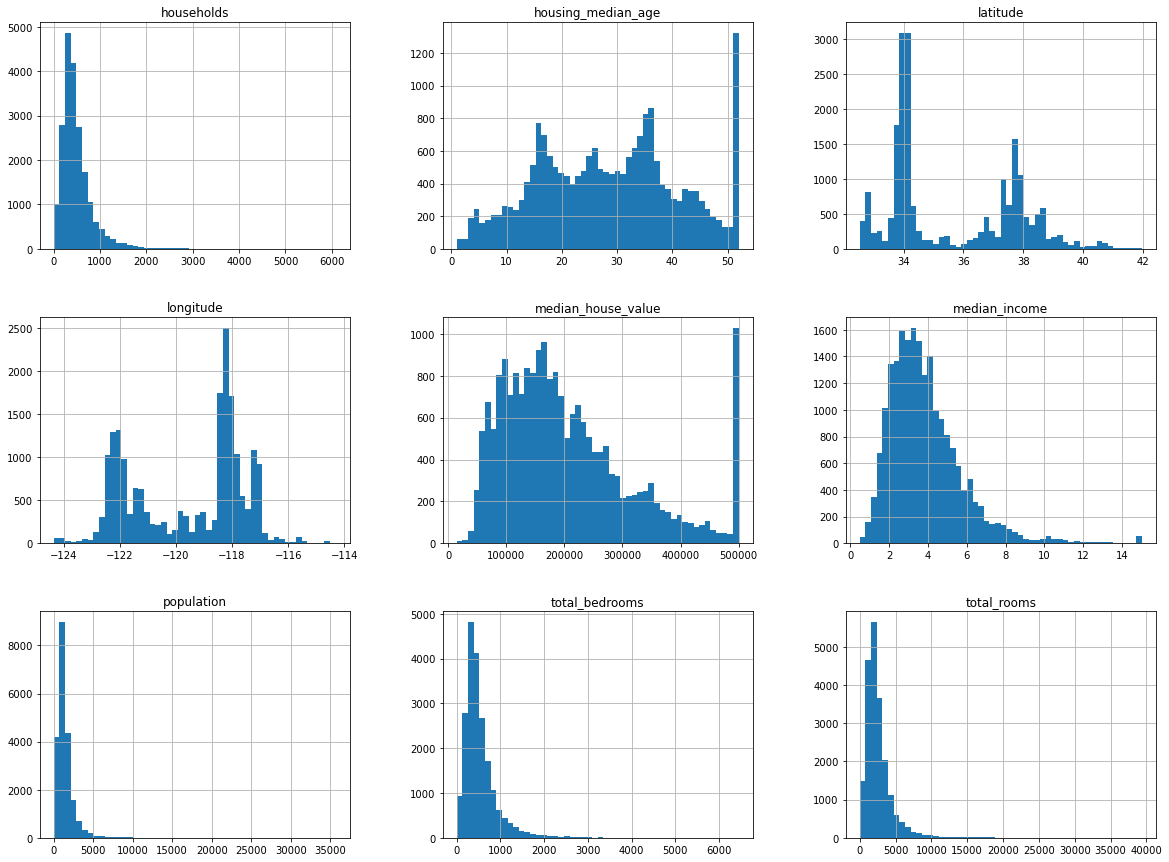

In [13]:
# magic command to configure matplotlib to use Jupyter notebook's own graphical backend
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
#plt.show()

### Observations from the histograms
- households: most districts have under 1000 households
- median_house_age: capped at 50, i.e., houses more than 50 years old are marked as 50
- median_house_value
 - fewer houses are above 400K in value
 - house values are capped at 500K (hence the tall bar at the end)
- median_income is not in USD, it is scaled from approximately 0.5 to 15, and capped at 15

## Visualize geographic data

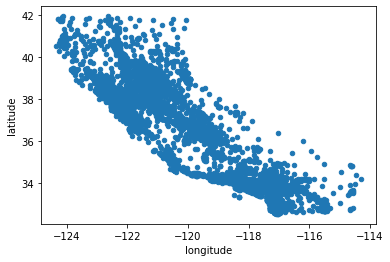

In [14]:
housing.plot(kind='scatter', x='longitude', y='latitude')

### Set transparency setting so it is easier to visualize high density areas

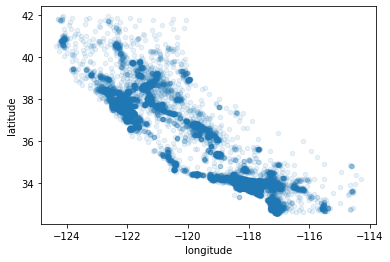

In [16]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

### Represent population by radius of circle

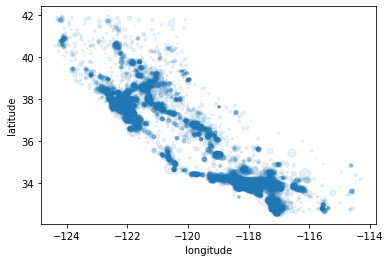

In [19]:
# population scaled by dividing by hundred, for clear visualization
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1, 
             s=housing['population']/100)

### Represent house price by color

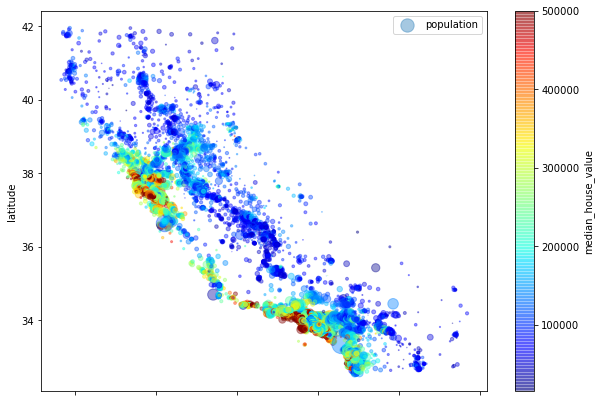

In [22]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
             s=housing['population']/100, label='population',
             c='median_house_value', cmap=plt.get_cmap('jet'), figsize=(10,7))

## Look for correlations in the data: how attributes are related to each other

In [23]:
corr_matrix = housing.corr()

### How is each attribute related to median_house_value? 

In [24]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

### Observations: values closer to 1 indicate strong correlation
- median income is correlated with house value: there is a positive correlation
- there is a weak correlation with total bedrooms

## Alternative to correlation: use a Scatter Matrix to plot numerical attributes with each other

In [25]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2e8c84590>,
      dtype=object)

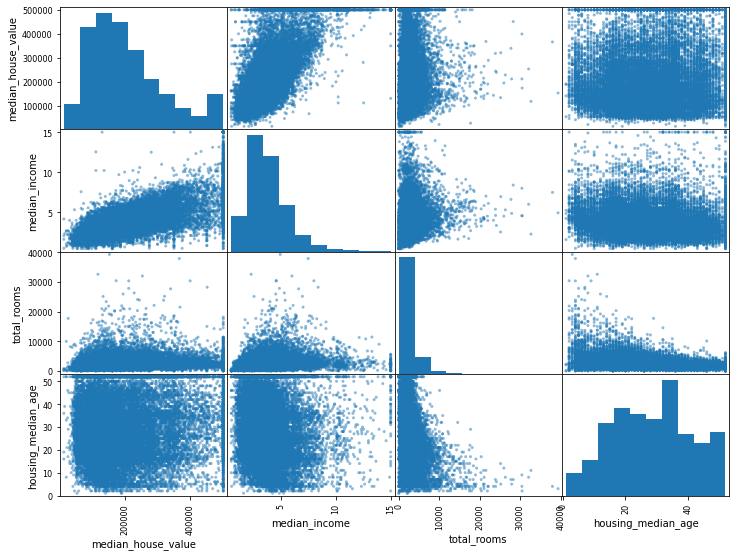

In [26]:
# choose numerical attributes
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 9))

### Observation: median income looks like a good predictor of house value

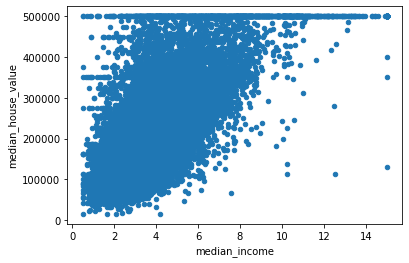

In [27]:
housing.plot(kind='scatter', x='median_income', y='median_house_value')

### * notice values capped at 500K

## Generate some new attributes

In [28]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

### Generate the correlation matrix again with these new attributes

In [29]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

### Observations: 
- Bedrooms per room has a stronger (and negative) correlation (-0.25) with house value than simply bedrooms (+0.04)
 - Houses with a lower bedroom to room ratio tend to be more expensive
- Rooms per household has a positive correlation with house value
 - The larger the house, the more expensive it is

## Handling Text and Categorical Attributes: Encoding
- Text and categorical data need to be transformed to numerical representations for machine learning
- ocean_proximity is a categorical variable in our dataset

In [31]:
# Install the Scikit-Learn library if you haven't already
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [32]:
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([3, 3, 3, ..., 1, 1, 1])

In [33]:
set(housing_cat_encoded) # unique encoded values

{0, 1, 2, 3, 4}

### Observation: each of the four unique values for ocean proximity is mapped to an integer
- Issue: ML algorithms will assume two nearby values are more similar than two distant values
 - To solve this, represent each attribute by a binary encoding (*one-hot encoding*)

## One-hot  encoding

In [35]:
# First, reshape above encoding into a 2D array
housing_cat_encoded.reshape(-1, 1)

array([[3],
       [3],
       [3],
       ...,
       [1],
       [1],
       [1]])

In [39]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

## Convert from text -> integer -> one-hot vector in one step

In [40]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [42]:
housing_with_encoding = pd.concat([housing, pd.DataFrame(housing_cat_1hot)], axis=1)

In [44]:
housing_with_encoding.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,0,1,2,3,4
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,0,0,0,1,0


In [48]:
housing_ocean = housing_with_encoding[['ocean_proximity', 0, 1, 2, 3, 4]]
housing_ocean.sample(n=10)

,ocean_proximity,0,1,2,3,4
1889,INLAND,0,1,0,0,0
20261,NEAR OCEAN,0,0,0,0,1
5968,INLAND,0,1,0,0,0
19571,INLAND,0,1,0,0,0
2365,INLAND,0,1,0,0,0
3623,<1H OCEAN,1,0,0,0,0
15286,NEAR OCEAN,0,0,0,0,1
13415,INLAND,0,1,0,0,0
17849,<1H OCEAN,1,0,0,0,0
9952,INLAND,0,1,0,0,0


In [ ]:
housing_with_encoding[['ocean_proximity', 0, 1, 2, 3, 4]]